In [340]:
#carga de librerias 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.special as special 
from scipy.optimize import curve_fit
import seaborn as sns 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [341]:
#cargar archivo csv desde seaborn 
df=pd.read_csv('Victoria_limpio.csv')
df = df.drop(['Unnamed: 0'], axis=1)

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   3967 non-null   object 
 1   name                                          3967 non-null   object 
 2   description                                   3967 non-null   object 
 3   neighborhood_overview                         3967 non-null   object 
 4   picture_url                                   3967 non-null   object 
 5   host_name                                     3967 non-null   object 
 6   host_since                                    3967 non-null   object 
 7   host_response_time                            3967 non-null   object 
 8   host_response_rate                            3967 non-null   object 
 9   host_is_superhost                             3967 non-null   o

In [343]:
#cargar archivo csv desde seaborn 
df1=pd.read_csv('Victoria_limpio.csv')
df1 = df1.drop(['Unnamed: 0'], axis=1)

In [344]:
f1=df1

In [345]:
#convertimos las variables de tipo object a tipo numérico 
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})
f1['has_availability'] = f1['has_availability'].replace({'f': 0, 't': 1})
frecuencias = f1['property_type'].value_counts()
f1['property_type'] = f1['property_type'].map(frecuencias)


f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})


f1['host_response_time'] = f1['host_response_time'].map({
    'within an hour': 1,
    'within a few hours': 2,
    'within a day': 3,
    'a few days or more': 4,
    'Desconocido' : 5
})

f1['price'] = f1['price'].astype(str).str.rstrip('$')
f1['price'] = pd.to_numeric(f1['price'], errors='coerce').fillna(0)

C:\Users\josse\AppData\Local\Temp\ipykernel_14340\3032408551.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\josse\AppData\Local\Temp\ipykernel_14340\3032408551.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
C:\Users\josse\AppData\Local\Temp\ipykernel_14340\3032408551.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remove

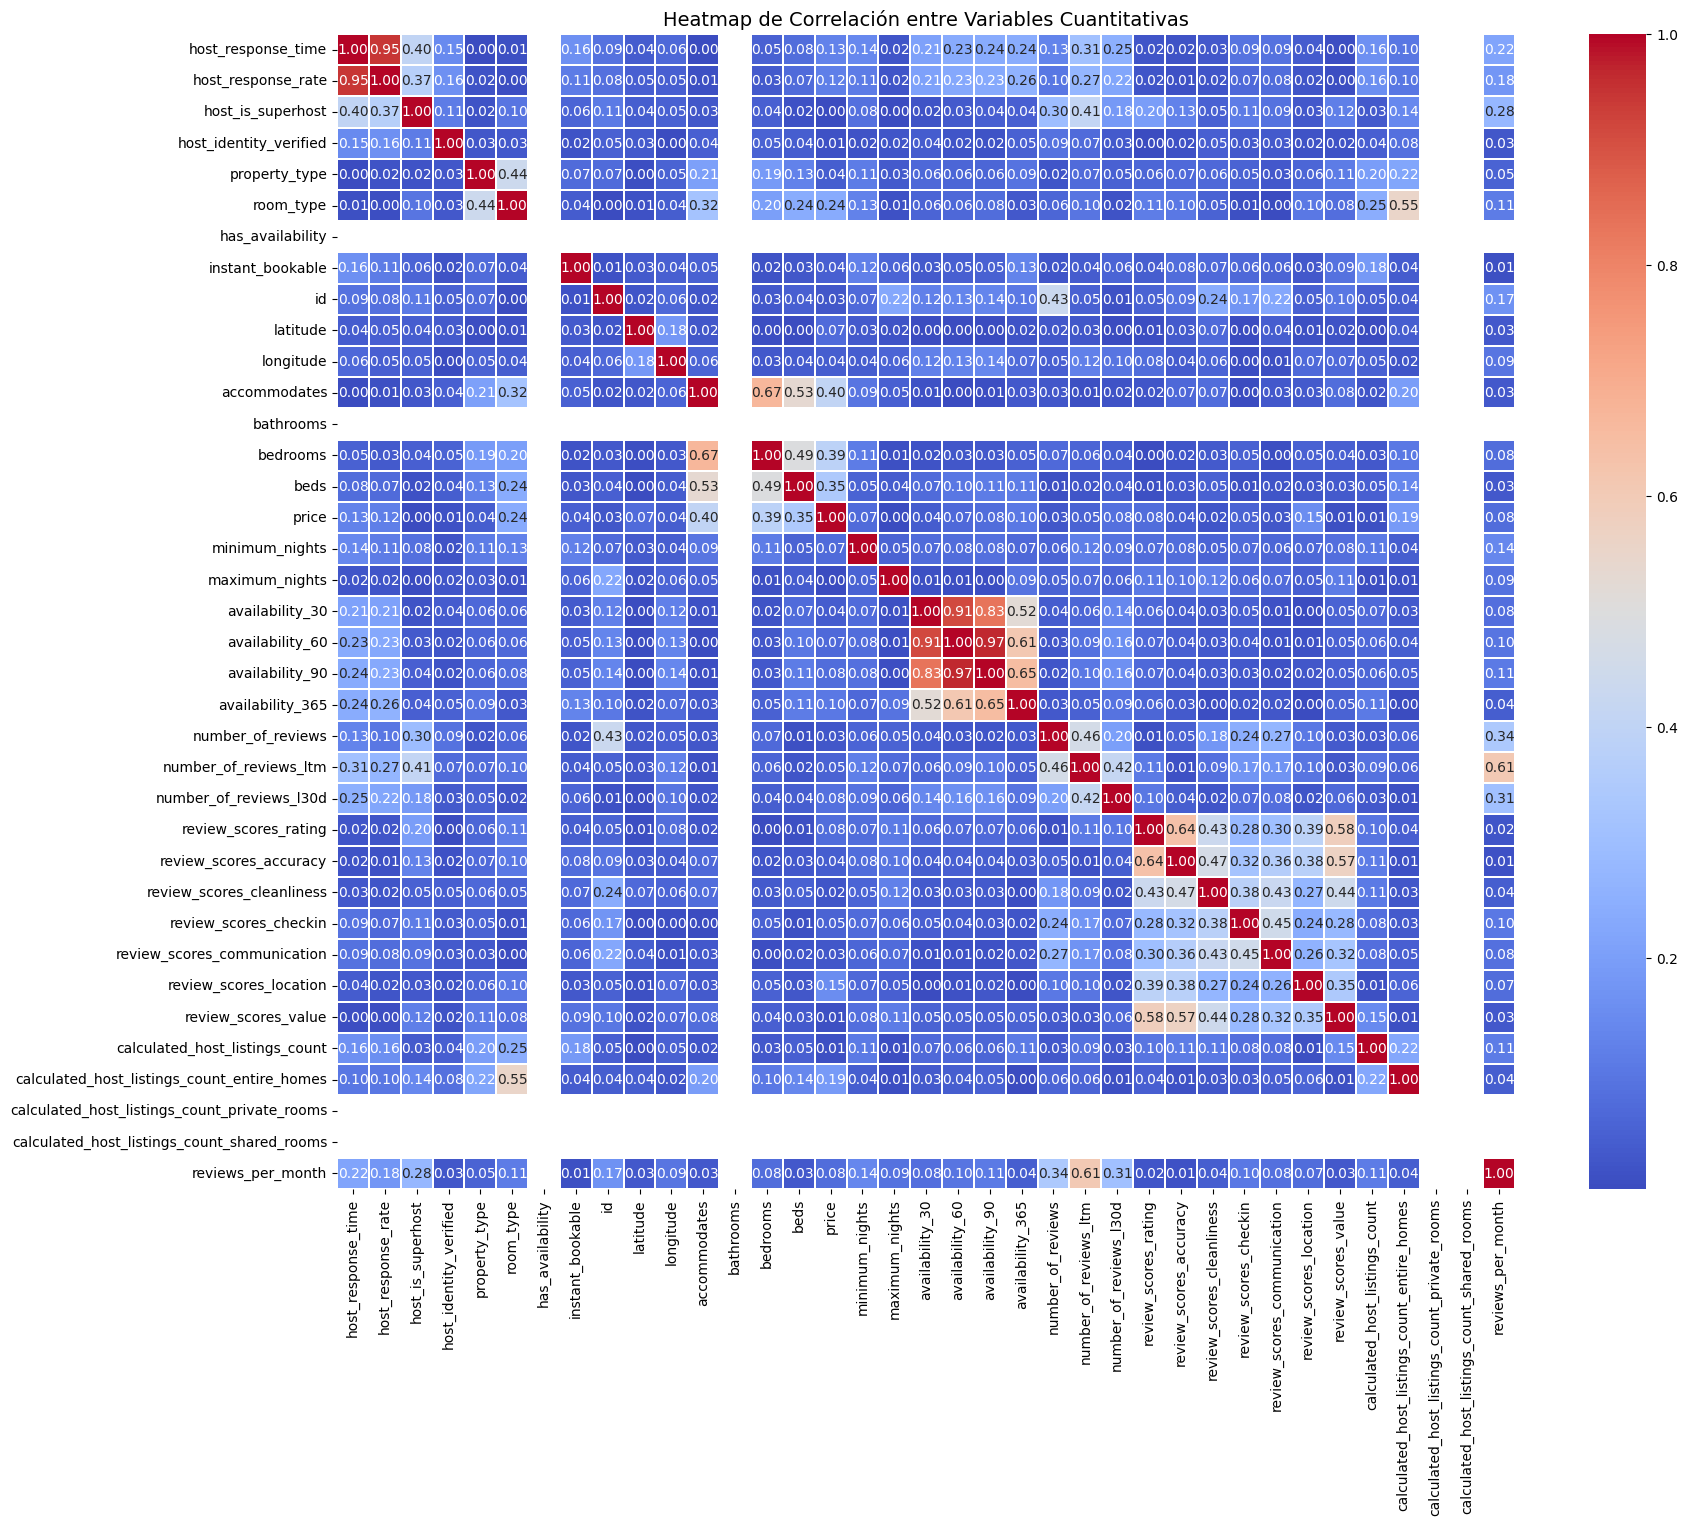

In [346]:
df1_numeric = f1.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = df1_numeric.corr()
corr_matrix2= abs(corr_matrix)

# Crear el heatmap
plt.figure(figsize=(19, 15))  # Ajusta el tamaño
sns.heatmap(corr_matrix2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.10)

# Configurar el título
plt.title("Heatmap de Correlación entre Variables Cuantitativas", fontsize=14)

# Mostrar la gráfica
plt.show()

In [347]:
#verificar los valores sin repetirse de una columna 
unico = np.unique(df['room_type'])
unico
conteo = df["room_type"].value_counts()  # Cuenta por categoría
conteo

room_type
Entire home/apt    3351
Private room        602
Shared room          13
Hotel room            1
Name: count, dtype: int64

In [348]:
unico = np.unique(df['property_type'])
unico

array(['Boat', 'Bus', 'Camper/RV', 'Campsite', 'Castle', 'Dome',
       'Earthen home', 'Entire bed and breakfast', 'Entire bungalow',
       'Entire cabin', 'Entire chalet', 'Entire condo', 'Entire cottage',
       'Entire guest suite', 'Entire guesthouse', 'Entire home',
       'Entire loft', 'Entire place', 'Entire rental unit',
       'Entire serviced apartment', 'Entire townhouse',
       'Entire vacation home', 'Entire villa', 'Farm stay', 'Houseboat',
       'Island', 'Private room', 'Private room in bed and breakfast',
       'Private room in boat', 'Private room in bungalow',
       'Private room in cabin', 'Private room in camper/rv',
       'Private room in condo', 'Private room in cottage',
       'Private room in farm stay', 'Private room in guest suite',
       'Private room in guesthouse', 'Private room in home',
       'Private room in hostel', 'Private room in minsu',
       'Private room in nature lodge',
       'Private room in religious building',
       'Private ro

In [349]:
unico = np.unique(df['bathrooms_text'])
unico

array(['0 baths', '0 shared baths', '1 bath', '1 private bath',
       '1 shared bath', '1.5 baths', '1.5 shared baths', '2 baths',
       '2 shared baths', '2.5 baths', '2.5 shared baths', '3 baths',
       '3 shared baths', '3.5 baths', '4 baths', '4.5 baths', '5 baths',
       '5.5 baths', '6 baths', '6.5 baths', 'Half-bath',
       'Shared half-bath'], dtype=object)

In [350]:
#Convertimos la variable dependiente a dicotómica
df['room_type']= df['room_type'].replace(["Hotel room", "Shared room", "Private room"], "No Entire")

#convertimos host_response_time en dicotómica 
df['host_response_time']=df['host_response_time'].replace(["within an hour", "within a few hours", "within a day"], "Rapida")
df['host_response_time']=df['host_response_time'].replace(["a few days or more", "Desconocido"], "No rapida")

# Para convertir property_type. Listas de palabras clave para clasificar
entire_place_keywords = [
    'Entire', 'Boat', 'Campsite', 'Castle', 'Dome', 
    'Earthen home', 'Farm stay', 'Holiday park', 
    'Hut', 'Tiny home', 'Tower', 'Shipping container', 'Tent'
]
# Aquí asumimos que el resto se clasifica como "Room"

# Función para asignar una única categoría
def categorize_property(property_type):
    # Si se encuentra alguna palabra clave en entire_place_keywords, se clasifica como 'Entire Place'
    if any(keyword in property_type for keyword in entire_place_keywords):
        return 'Entire Place'
    # Si no, se asigna 'No Entire'
    else:
        return 'No Entire'

# Aplicar la función a la columna property_type para crear una nueva columna
df['property_type'] = df['property_type'].apply(categorize_property)

# Convertir la columna 'host_response_rate' a dicotómica 
# Función para limpiar y convertir los valores
def clean_and_convert(value):
    if value == '-' or value is None:  # Tratamos -% como valor bajo 
        return -1 
    try:
        return float(value.replace('%', '')) 
    except ValueError:
        return None  

df['host_response_rate_num'] = df['host_response_rate'].apply(clean_and_convert)
def categorize_response_rate(value):
    if value < 50:  
        return 'Respuesta baja'
    else:  
        return 'Respuesta alta'
df['host_response_rate'] = df['host_response_rate_num'].apply(categorize_response_rate)

#minimum nights
def categorize_minimum_nights(value):
    if value < 2:
        return 'Bajo'
    else:
        return 'Alto'

df['minimum_nights'] = df['minimum_nights'].apply(categorize_minimum_nights)

#maximum nights
def categorize_maximum_nights(value):
    if value < 201:
        return 'Bajo'
    else:
        return 'Alto'

df['maximum_nights'] = df['maximum_nights'].apply(categorize_maximum_nights)

# Función de categorización para bathrooms_text
def categorize_bathrooms(value):
    value = value.lower()  # Convertir todo a minúsculas para evitar errores
    
    # Categoría de "Baños limitados" (0 baños, baños compartidos o medios baños)
    if 'shared' in value or '0' in value or 'half' in value:
        return 'Limitados'
    
    # Categoría de "Baños privados suficientes" (1 o más baños privados)
    return 'No limitados'

# Aplicar la función
df['bathrooms_text'] = df['bathrooms_text'].apply(categorize_bathrooms)



df

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_rate_num
0,https://www.airbnb.com/rooms/19898,Duchess Suite,No se proporciona descripción,No se proporcionan detalles,https://a0.muscache.com/pictures/101822/ae950f...,Ryan,2010-01-11,No rapida,Respuesta alta,f,...,5.00,5.00,4.90,4.80,1.0,0.0,0.0,0.0,1.90,NaN
1,https://www.airbnb.com/rooms/83515,GALLERY B&B SUITE,A quiet and sunny suite with a private entranc...,"Our property has gardens, an orchard, a pond a...",https://a0.muscache.com/pictures/6110737/930db...,Celia,2011-03-21,Rapida,Respuesta alta,t,...,4.92,4.84,4.94,4.75,2.0,2.0,0.0,0.0,0.90,100.0
2,https://www.airbnb.com/rooms/168460,Perfectly located lovely home,"Wonderful neighborhood, two blocks to inner ha...",Lovely neighborhood with friendly neighbors su...,https://a0.muscache.com/pictures/7a2bfc51-fd59...,Deborah,2011-07-10,No rapida,Respuesta alta,f,...,4.89,4.92,5.00,4.90,1.0,1.0,0.0,0.0,0.43,NaN
3,https://www.airbnb.com/rooms/185732,Romantic 2 bedroom private suite,The unit is a 2 bedroom suite sectioned off fr...,No se proporcionan detalles,https://a0.muscache.com/pictures/20829630/9356...,Peter,2011-07-27,No rapida,Respuesta baja,f,...,4.82,4.88,4.90,4.61,3.0,0.0,0.0,0.0,0.32,10.0
4,https://www.airbnb.com/rooms/193366,Tudor Cottage,"In the historic Rockland area of Victoria, thi...",We are surrounded by heritage homes with lovel...,https://a0.muscache.com/pictures/6145514/1eb8d...,Sandra,2011-08-07,Rapida,Respuesta alta,f,...,4.92,4.89,4.88,4.76,1.0,1.0,0.0,0.0,1.01,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,https://www.airbnb.com/rooms/1297151447049091869,Beach getaway,Your family will be close to everything when y...,No se proporcionan detalles,https://a0.muscache.com/pictures/hosting/Hosti...,Rachel,2016-06-12,Rapida,Respuesta alta,f,...,5.00,5.00,4.90,4.80,1.0,1.0,0.0,0.0,1.90,100.0
3963,https://www.airbnb.com/rooms/1297951442048266188,Elora Oceanside Retreat - Side A,"Welcome to Elora Oceanside Retreat, A blend of...",No se proporcionan detalles,https://a0.muscache.com/pictures/miso/Hosting-...,Daniel Bryan,2015-08-03,No rapida,Respuesta alta,f,...,5.00,5.00,4.90,4.80,2.0,2.0,0.0,0.0,1.90,NaN
3964,https://www.airbnb.com/rooms/1298057658412712726,Lakeside Cottage,Kick back and relax in this tranquil retreat o...,No se proporcionan detalles,https://a0.muscache.com/pictures/miso/Hosting-...,Melanie,2024-11-25,No rapida,Respuesta alta,f,...,5.00,5.00,4.90,4.80,1.0,1.0,0.0,0.0,1.90,NaN
3965,https://www.airbnb.com/rooms/1298245712044358317,Elora Oceanside Retreat - Side B,"Welcome to Elora Oceanside Retreat, A blend of...",No se proporcionan detalles,https://a0.muscache.com/pictures/miso/Hosting-...,Daniel Bryan,2015-08-03,No rapida,Respuesta alta,f,...,5.00,5.00,4.90,4.80,2.0,2.0,0.0,0.0,1.90,NaN


In [351]:
unico = np.unique(df['property_type'])
unico

array(['Entire Place', 'No Entire'], dtype=object)

In [352]:
unico = np.unique(df['host_response_rate'])
unico

array(['Respuesta alta', 'Respuesta baja'], dtype=object)

In [353]:
unico = np.unique(df['minimum_nights'])
unico

array(['Alto', 'Bajo'], dtype=object)

In [354]:
unico = np.unique(df['maximum_nights'])
unico

array(['Alto', 'Bajo'], dtype=object)

In [355]:
unico = np.unique(df['bathrooms_text'])
unico

array(['Limitados', 'No limitados'], dtype=object)

**Lineal**

In [356]:
#definimos variables independientes
Vars_Indep1 = df[['number_of_reviews', 'number_of_reviews_ltm']]
Vars_Indep2 = df[['availability_365', 'availability_90', 'availability_60']]
Vars_Indep3 = df[['availability_365', 'number_of_reviews_ltm']]
Vars_Indep4 = df[['calculated_host_listings_count', 'calculated_host_listings_count_entire_homes']]
Vars_Indep5 = df[['calculated_host_listings_count_private_rooms', 'accommodates']]
Vars_Indep6 = df[['accommodates', 'price', 'bedrooms']]
Vars_Indep7 = df[['review_scores_value', 'availability_30']]
Vars_Indep8 = df[['accommodates', 'price', 'bedrooms']]
Vars_Indep9 = df[['number_of_reviews_ltm' ,'calculated_host_listings_count', 'reviews_per_month']]
Vars_Indep10 = df[['number_of_reviews', 'availability_365']]

In [357]:
#Definimos variables dependientes 
#Dicotómicas por naturaleza 
Var_Dep1 = df['host_is_superhost']
Var_Dep2 = df['host_identity_verified']
Var_Dep4 = df['instant_bookable']
#Convertidas a dicotómicas 
Var_Dep3 = df['bathrooms_text']
Var_Dep5 = df['room_type']
Var_Dep6 = df['host_response_time']
Var_Dep7 = df['minimum_nights']
Var_Dep8 = df['property_type']
Var_Dep9 = df['host_response_rate']
Var_Dep10 = df['maximum_nights']

In [358]:
#Redefinimos las variables 
X1= Vars_Indep1
y1= Var_Dep1

X2= Vars_Indep2
y2= Var_Dep2

X3= Vars_Indep3
y3= Var_Dep3

X4= Vars_Indep4
y4= Var_Dep4

X5= Vars_Indep5
y5= Var_Dep5

X6= Vars_Indep6
y6= Var_Dep6

X7= Vars_Indep7
y7= Var_Dep7

X8= Vars_Indep8
y8= Var_Dep8

X9= Vars_Indep9
y9= Var_Dep9

X10 = Vars_Indep10
y10 = Var_Dep10


In [359]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba: 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=None)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=None)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=None)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=None)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=None)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.3, random_state=None)
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.3, random_state=None)
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.3, random_state=None)
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, test_size=0.3, random_state=None)
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.3, random_state=None)

In [360]:
#Se escalan todos los datos 
escalar1 = StandardScaler()
escalar2 = StandardScaler()
escalar3 = StandardScaler()
escalar4 = StandardScaler()
escalar5 = StandardScaler()
escalar6 = StandardScaler()
escalar7 = StandardScaler()
escalar8 = StandardScaler()
escalar9 = StandardScaler()
escalar10 = StandardScaler()

In [361]:
#Para realizar el escalamiento de las variables "X" tanto de entrenamiento como de prueba utilizaremos: 
X1_train = escalar1.fit_transform(X1_train)
X1_test = escalar1.transform(X1_test)

X2_train = escalar2.fit_transform(X2_train)
X2_test = escalar2.transform(X2_test)

X3_train = escalar3.fit_transform(X3_train)
X3_test = escalar3.transform(X3_test)

X4_train = escalar4.fit_transform(X4_train)
X4_test = escalar4.transform(X4_test)

X5_train = escalar5.fit_transform(X5_train)
X5_test = escalar5.transform(X5_test)

X6_train = escalar6.fit_transform(X6_train)
X6_test = escalar6.transform(X6_test)

X7_train = escalar7.fit_transform(X7_train)
X7_test = escalar7.transform(X7_test)

X8_train = escalar8.fit_transform(X8_train)
X8_test = escalar8.transform(X8_test)

X9_train = escalar9.fit_transform(X9_train)
X9_test = escalar9.transform(X9_test)

X8_train = escalar10.fit_transform(X10_train)
X8_test = escalar10.transform(X10_test)

In [362]:
#Definimos el algoritmo a utilizar 
from sklearn.linear_model import LogisticRegression
algoritmo1 = LogisticRegression()
algoritmo2 = LogisticRegression()
algoritmo3 = LogisticRegression()
algoritmo4 = LogisticRegression()
algoritmo5 = LogisticRegression()
algoritmo6 = LogisticRegression()
algoritmo7 = LogisticRegression()
algoritmo8 = LogisticRegression()
algoritmo9 = LogisticRegression()
algoritmo10 = LogisticRegression()

In [363]:
#entrenamos el modelo 
algoritmo1.fit(X1_train, y1_train)
algoritmo2.fit(X2_train, y2_train)
algoritmo3.fit(X3_train, y3_train)
algoritmo4.fit(X4_train, y4_train)
algoritmo5.fit(X5_train, y5_train)
algoritmo6.fit(X6_train, y6_train)
algoritmo7.fit(X7_train, y7_train)
algoritmo8.fit(X8_train, y8_train)
algoritmo9.fit(X9_train, y9_train)
algoritmo10.fit(X10_train, y10_train)

LogisticRegression()

**host_is_superhost**

In [364]:
#Realizamos una predicción 
y1_pred = algoritmo1.predict(X1_test)
y1_pred

array(['t', 't', 'f', ..., 'f', 'f', 'f'], shape=(1191,), dtype=object)

In [365]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz1 = confusion_matrix(y1_test, y1_pred)
print('Matriz de Confusión: ')
print (matriz1)

Matriz de Confusión: 
[[429 127]
 [196 439]]


In [366]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision1 = precision_score(y1_test, y1_pred, average="binary", pos_label="t")
print('Precision del modelo:')
print(precision1)

Precision del modelo:
0.7756183745583038


In [367]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud1 = accuracy_score(y1_test, y1_pred)
print('Exactitud del modelo:')
print(exactitud1)

Exactitud del modelo:
0.7287993282955499


In [368]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad1 = recall_score(y1_test, y1_pred, average="binary", pos_label="f")
print('Sensibilidad del modelo:')
print(sensibilidad1)

Sensibilidad del modelo:
0.7715827338129496


**host_identity_verified**

In [369]:
#Realizamos una predicción 
y2_pred = algoritmo2.predict(X2_test)
y2_pred

array(['t', 't', 't', ..., 't', 't', 't'], shape=(1191,), dtype=object)

In [370]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz2 = confusion_matrix(y2_test, y2_pred)
print('Matriz de Confusión: ')
print (matriz2)

Matriz de Confusión: 
[[   0   80]
 [   0 1111]]


In [371]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision2 = precision_score(y2_test, y2_pred, average="binary", pos_label="t")
print('Precision del modelo:')
print(precision2)

Precision del modelo:
0.9328295549958019


In [372]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud2 = accuracy_score(y2_test, y2_pred)
print('Exactitud del modelo:')
print(exactitud2)

Exactitud del modelo:
0.9328295549958019


In [373]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad2 = recall_score(y2_test, y2_pred, average="binary", pos_label="f")
print('Sensibilidad del modelo:')
print(sensibilidad2)

Sensibilidad del modelo:
0.0


**bathrooms_text**

In [374]:
#Realizamos una predicción 
y3_pred = algoritmo3.predict(X3_test)
y3_pred

array(['No limitados', 'No limitados', 'No limitados', ...,
       'No limitados', 'No limitados', 'No limitados'],
      shape=(1191,), dtype=object)

In [375]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz3 = confusion_matrix(y3_test, y3_pred)
print('Matriz de Confusión: ')
print (matriz3)

Matriz de Confusión: 
[[   0   71]
 [   0 1120]]


In [376]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision3 = precision_score(y3_test, y3_pred, average="binary", pos_label="Limitados")
print('Precision del modelo:')
print(precision3)

Precision del modelo:
0.0


c:\Users\josse\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [377]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud3 = accuracy_score(y3_test, y3_pred)
print('Exactitud del modelo:')
print(exactitud3)

Exactitud del modelo:
0.9403862300587741


In [378]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad3 = recall_score(y3_test, y3_pred, average="binary", pos_label="No limitados")
print('Sensibilidad del modelo:')
print(sensibilidad3)

Sensibilidad del modelo:
1.0


**instant_bookable**

In [379]:
#Realizamos una predicción 
y4_pred = algoritmo4.predict(X4_test)
y4_pred

array(['f', 'f', 'f', ..., 'f', 'f', 'f'], shape=(1191,), dtype=object)

In [380]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz4 = confusion_matrix(y4_test, y4_pred)
print('Matriz de Confusión: ')
print (matriz4)

Matriz de Confusión: 
[[902   8]
 [265  16]]


In [381]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision4 = precision_score(y4_test, y4_pred, average="binary", pos_label="t")
print('Precision del modelo:')
print(precision1)

Precision del modelo:
0.7756183745583038


In [382]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud4 = accuracy_score(y4_test, y4_pred)
print('Exactitud del modelo:')
print(exactitud4)

Exactitud del modelo:
0.7707808564231738


In [383]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad4 = recall_score(y4_test, y4_pred, average="binary", pos_label="f")
print('Sensibilidad del modelo:')
print(sensibilidad4)

Sensibilidad del modelo:
0.9912087912087912


**room_type**

In [384]:
#Realizamos una predicción 
y5_pred = algoritmo5.predict(X5_test)
y5_pred

array(['Entire home/apt', 'Entire home/apt', 'Entire home/apt', ...,
       'Entire home/apt', 'Entire home/apt', 'Entire home/apt'],
      shape=(1191,), dtype=object)

In [385]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz5 = confusion_matrix(y5_test, y5_pred)
print('Matriz de Confusión: ')
print (matriz5)

Matriz de Confusión: 
[[1006    0]
 [ 185    0]]


In [386]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision5 = precision_score(y5_test, y5_pred, average="binary", pos_label="Entire home/apt")
print('Precision del modelo:')
print(precision5)

Precision del modelo:
0.8446683459277917


In [387]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud5 = accuracy_score(y5_test, y5_pred)
print('Exactitud del modelo:')
print(exactitud5)

Exactitud del modelo:
0.8446683459277917


In [388]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad5 = recall_score(y5_test, y5_pred, average="binary", pos_label="No Entire")
print('Sensibilidad del modelo:')
print(sensibilidad5)

Sensibilidad del modelo:
0.0


**host_response_time**

In [389]:
#Realizamos una predicción 
y6_pred = algoritmo6.predict(X6_test)
y6_pred

array(['Rapida', 'Rapida', 'Rapida', ..., 'Rapida', 'Rapida', 'Rapida'],
      shape=(1191,), dtype=object)

In [390]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz6 = confusion_matrix(y6_test, y6_pred)
print('Matriz de Confusión: ')
print (matriz6)

Matriz de Confusión: 
[[  0 233]
 [  0 958]]


In [391]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision6 = precision_score(y6_test, y6_pred, average="binary", pos_label="Rapida")
print('Precision del modelo:')
print(precision6)

Precision del modelo:
0.8043660789252729


In [392]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud6 = accuracy_score(y6_test, y6_pred)
print('Exactitud del modelo:')
print(exactitud6)

Exactitud del modelo:
0.8043660789252729


In [393]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad6= recall_score(y6_test, y6_pred, average="binary", pos_label="No rapida")
print('Sensibilidad del modelo:')
print(sensibilidad6)

Sensibilidad del modelo:
0.0


**mimimun_nights**

In [394]:
#Realizamos una predicción 
y7_pred = algoritmo7.predict(X7_test)
y7_pred

array(['Alto', 'Alto', 'Alto', ..., 'Alto', 'Alto', 'Alto'],
      shape=(1191,), dtype=object)

In [395]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz7 = confusion_matrix(y7_test, y7_pred)
print('Matriz de Confusión: ')
print (matriz7)

Matriz de Confusión: 
[[871   0]
 [320   0]]


In [396]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision7 = precision_score(y7_test, y7_pred, average="binary", pos_label="Alto")
print('Precision del modelo:')
print(precision7)

Precision del modelo:
0.7313182199832073


In [397]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud7 = accuracy_score(y7_test, y7_pred)
print('Exactitud del modelo:')
print(exactitud7)

Exactitud del modelo:
0.7313182199832073


In [398]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad7= recall_score(y7_test, y7_pred, average="binary", pos_label="Bajo")
print('Sensibilidad del modelo:')
print(sensibilidad7)

Sensibilidad del modelo:
0.0


**property_type**

In [399]:
#Realizamos una predicción 
y8_pred = algoritmo8.predict(X8_test)
y8_pred

array(['Entire Place', 'Entire Place', 'Entire Place', ...,
       'Entire Place', 'Entire Place', 'Entire Place'],
      shape=(1191,), dtype=object)

In [400]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz8 = confusion_matrix(y8_test, y8_pred)
print('Matriz de Confusión: ')
print (matriz8)

Matriz de Confusión: 
[[991   0]
 [200   0]]


In [401]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision8 = precision_score(y8_test, y8_pred, average="binary", pos_label="Entire Place")
print('Precision del modelo:')
print(precision8)

Precision del modelo:
0.8320738874895046


In [402]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud8 = accuracy_score(y8_test, y8_pred)
print('Exactitud del modelo:')
print(exactitud8)

Exactitud del modelo:
0.8320738874895046


In [403]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad8= recall_score(y8_test, y8_pred, average="binary", pos_label="No Entire")
print('Sensibilidad del modelo:')
print(sensibilidad8)

Sensibilidad del modelo:
0.0


**host_response_rate**

In [404]:
#Realizamos una predicción 
y9_pred = algoritmo9.predict(X9_test)
y9_pred

array(['Respuesta alta', 'Respuesta alta', 'Respuesta alta', ...,
       'Respuesta alta', 'Respuesta alta', 'Respuesta alta'],
      shape=(1191,), dtype=object)

In [405]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz9 = confusion_matrix(y9_test, y9_pred)
print('Matriz de Confusión: ')
print (matriz9)

Matriz de Confusión: 
[[1166    0]
 [  25    0]]


In [406]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision9 = precision_score(y9_test, y9_pred, average="binary", pos_label="Respuesta alta")
print('Precision del modelo:')
print(precision9)

Precision del modelo:
0.979009235936188


In [407]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud9 = accuracy_score(y9_test, y9_pred)
print('Exactitud del modelo:')
print(exactitud9)

Exactitud del modelo:
0.979009235936188


In [408]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad9= recall_score(y9_test, y9_pred, average="binary", pos_label="Respuesta baja")
print('Sensibilidad del modelo:')
print(sensibilidad9)

Sensibilidad del modelo:
0.0


**maximum_nights**

In [409]:
#Realizamos una predicción 
y10_pred = algoritmo10.predict(X10_test)
y10_pred

array(['Alto', 'Alto', 'Alto', ..., 'Bajo', 'Alto', 'Alto'],
      shape=(1191,), dtype=object)

In [410]:
#Verifico la matriz de confusion 
from sklearn.metrics import confusion_matrix
matriz10 = confusion_matrix(y10_test, y10_pred)
print('Matriz de Confusión: ')
print (matriz10)

Matriz de Confusión: 
[[456 189]
 [315 231]]


In [411]:
#Calculo de la precision del modelo 
from sklearn.metrics import precision_score
precision10 = precision_score(y10_test, y10_pred, average="binary", pos_label="Alto")
print('Precision del modelo:')
print(precision10)

Precision del modelo:
0.5914396887159533


In [412]:
#Calculo la exactitud del modelo 
from sklearn.metrics import accuracy_score

exactitud10 = accuracy_score(y10_test, y10_pred)
print('Exactitud del modelo:')
print(exactitud10)

Exactitud del modelo:
0.5768261964735516


In [413]:
#Calculo la sensibilidad del modelo 
from sklearn.metrics import recall_score

sensibilidad10= recall_score(y10_test, y10_pred, average="binary", pos_label="Bajo")
print('Sensibilidad del modelo:')
print(sensibilidad10)

Sensibilidad del modelo:
0.4230769230769231
